In [1]:
from core.scenario import Scenario, Frame, AgentState
from core.feature_extraction import FeatureExtractor
from core.data_processing import get_dataset
from core.lanelet_helpers import LaneletHelpers
from igp2.maneuver import FollowLane, ManeuverConfig
from igp2.util import get_curvature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scenario = Scenario.load('../scenario_config/heckstrasse.json')

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


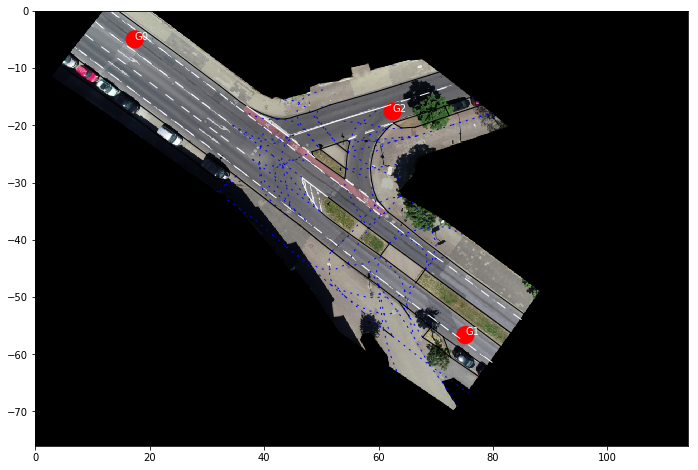

In [3]:
plt.figure(figsize=(12, 8))
scenario.plot()

In [4]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 13.8, -10.0, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
agent_id = 0
config = ManeuverConfig({'termination_point': (76.5, -57.3),
                         'initial_lanelet_id': -1770699,
                         'final_lanelet_id': -1770828})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)

path, velocity = maneuver.trajectory

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


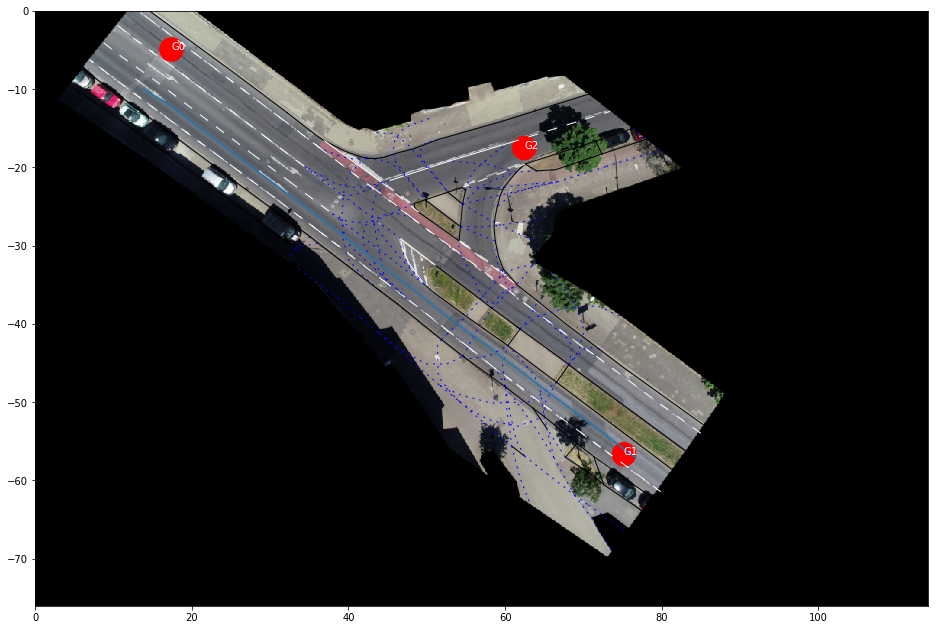

In [5]:
x = path[:, 0]
y = path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [6]:
curvature = get_curvature(path)

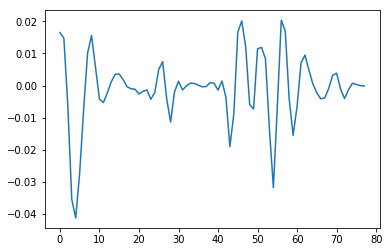

In [7]:
plt.plot(curvature)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


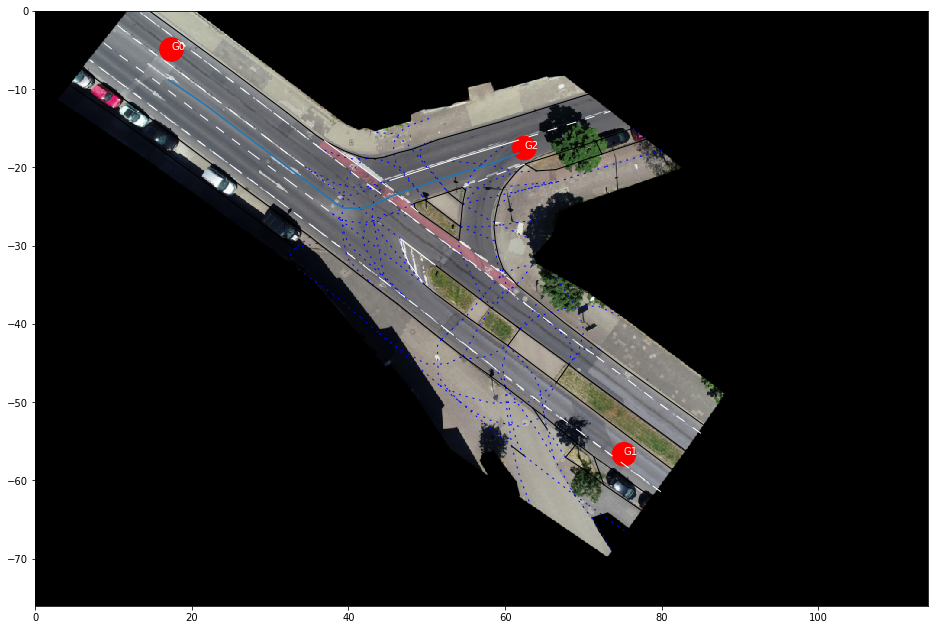

In [8]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 17.01, -8.83, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
config = ManeuverConfig({'termination_point': (61.83, -18.49),
                         'initial_lanelet_id': -1770700,
                         'final_lanelet_id': -1770707})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)

path, velocity = maneuver.trajectory

x = path[:, 0]
y = path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [9]:
from igp2.macro_action import ContinueLane

In [10]:
agent_id = 0
frame = Frame(0)
state = AgentState(0, 13.8, -10.0, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
goal = scenario.config.goals[1]
macro = ContinueLane(agent_id, frame, feature_extractor, goal)
path, velocity = macro.maneuvers[0].trajectory

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


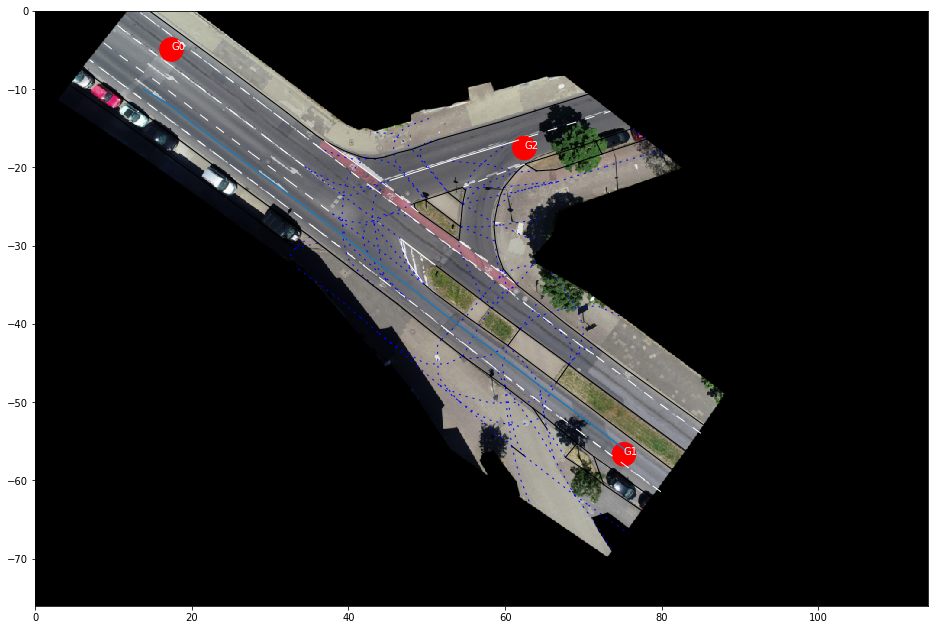

In [11]:
x = path[:, 0]
y = path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [12]:
macro.maneuvers